In [1]:
import numpy as np
import pandas as pd
import scipy 

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
df_segmentation = pd.read_csv('segmentationdata.csv' , index_col = 0)

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [7]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
df_segmentation.dtypes

Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


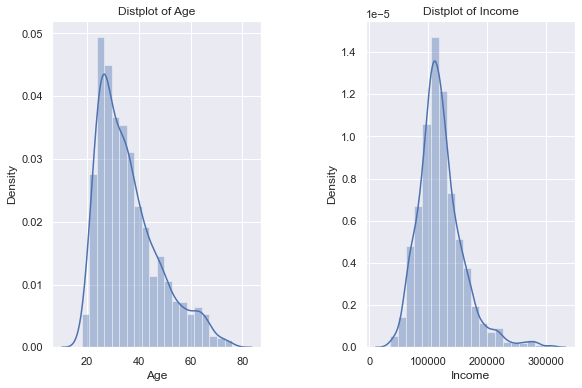

In [16]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age' , 'Income'] :
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_segmentation[x] , bins =20)
    title = 'Distplot of '+x
    plt.title(title)
plt.show()

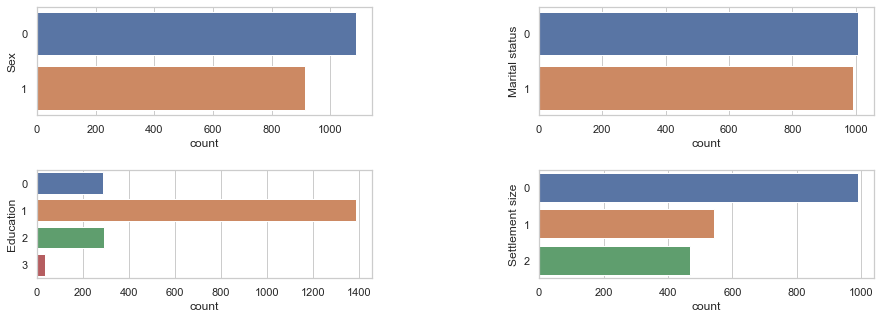

In [194]:
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
sns.set(style="whitegrid")
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.countplot(y='Sex',data=df_segmentation)

plt.subplot(2,2,2)
sns.set(style="whitegrid")
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.countplot(y='Marital status',data=df_segmentation)

plt.subplot(2,2,3)
sns.set(style="whitegrid")
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.countplot(y='Education',data=df_segmentation)

plt.subplot(2,2,4)
sns.set(style="whitegrid")
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.countplot(y='Settlement size',data=df_segmentation)

plt.show()

In [8]:
#Correlation Estimate
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


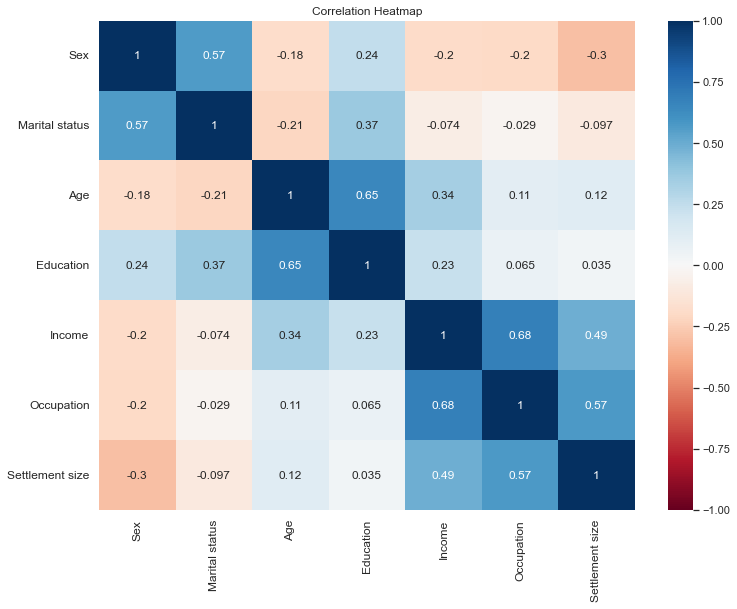

In [12]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(),annot = True,cmap = 'RdBu' ,vmin = -1 ,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels() , rotation = 0 , fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90 , fontsize =  12)
plt.title('Correlation Heatmap')
plt.show()

In [55]:
df_segmentation1 = df_segmentation.copy()
df_segmentation1['Sex'] = df_segmentation1['Sex'].map({0:'Male' , 1:'Female'} )
df_segmentation1['Education'] = df_segmentation1['Education'].map({0:'other / unknown' , 1:'high school' , 2:'university',
                                                                   3:'graduate school'})
df_segmentation1['Occupation'] = df_segmentation1['Occupation'].map({0:'unemployed' , 1:'skilled employee' ,
                                                                    2:' highly qualified employee',})

C:\Users\ayoub\AppData\Local\Temp\ipykernel_18440\1073290332.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','','single','','','','','non-single'])
C:\Users\ayoub\AppData\Local\Temp\ipykernel_18440\1073290332.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['','','small city','','mid-sized city','','big city'])


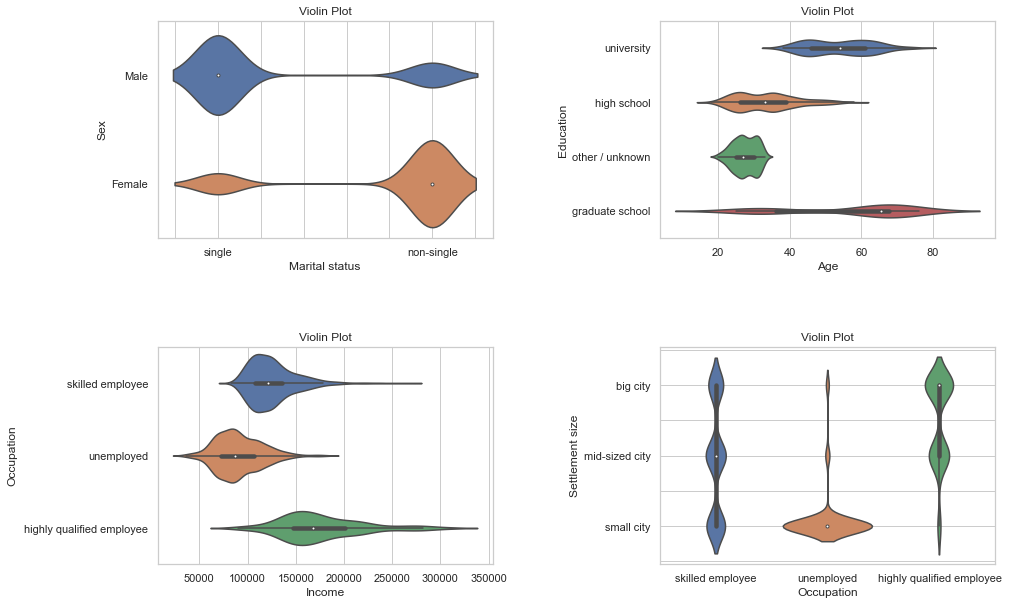

In [188]:
plt.figure(1, figsize=(15,10))
n=0
for cols in [('Marital status' , 'Sex') ,('Age' , 'Education') ,('Income' , 'Occupation'),('Occupation' , 'Settlement size')] :
    n+=1
    plt.subplot(2,2,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    ax = sns.violinplot(x = cols[0] , y = cols[1] , data = df_segmentation1)
    if n==1 :
        ax.set_xticklabels(['','','single','','','','','non-single'])
        
    if n==4 :
        ax.set_yticklabels(['','','small city','','mid-sized city','','big city'])
    
    plt.title('Violin Plot')
plt.show()

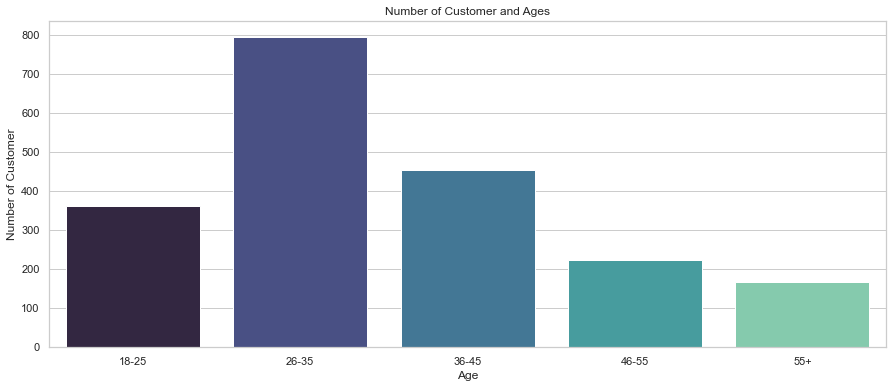

In [93]:
age_18_25 = df_segmentation.Age[(df_segmentation.Age >= 18) & (df_segmentation.Age <= 25)]
age_26_35 = df_segmentation.Age[(df_segmentation.Age >= 26) & (df_segmentation.Age <= 35)]
age_36_45 = df_segmentation.Age[(df_segmentation.Age >= 36) & (df_segmentation.Age <= 45)]
age_46_55 = df_segmentation.Age[(df_segmentation.Age >= 46) & (df_segmentation.Age <= 55)]
age_55above = df_segmentation.Age[(df_segmentation.Age >= 56) ]

agex = ["18-25" , "26-35" , "36-45" ,"46-55", "55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex , y=agey , palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

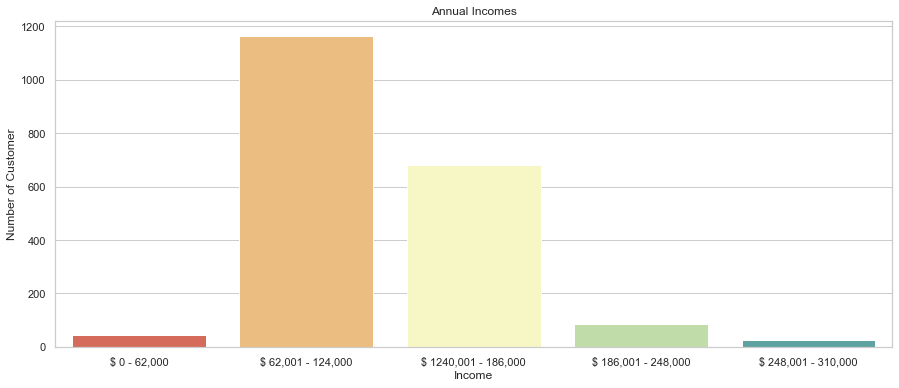

In [103]:
ai0_62 = df_segmentation["Income"][(df_segmentation["Income"] >= 0) & (df_segmentation["Income"] <= 62000)]
ai62_124 = df_segmentation["Income"][(df_segmentation["Income"] >= 62001) & (df_segmentation["Income"] <= 124000)]
ai124_186 = df_segmentation["Income"][(df_segmentation["Income"] >= 124001) & (df_segmentation["Income"] <= 186000)]
ai186_248 = df_segmentation["Income"][(df_segmentation["Income"] >= 186001) & (df_segmentation["Income"] <= 248000)]
ai248_310 = df_segmentation["Income"][(df_segmentation["Income"] >= 248001) & (df_segmentation["Income"] <= 310000)]


aix = ["$ 0 - 62,000", "$ 62,001 - 124,000", "$ 1240,001 - 186,000","$ 186,001 - 248,000","$ 248,001 - 310,000"]
aiy = [len(ai0_62.values),len(ai62_124.values),len(ai124_186.values),len(ai186_248.values),len(ai248_310.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

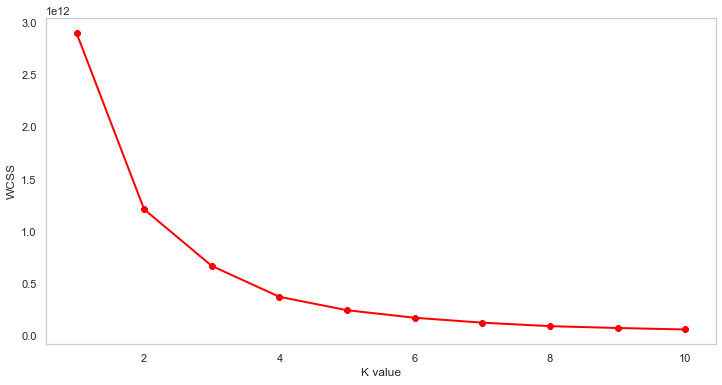

In [112]:
X3=df_segmentation.iloc[:,1:]

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [117]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X3)

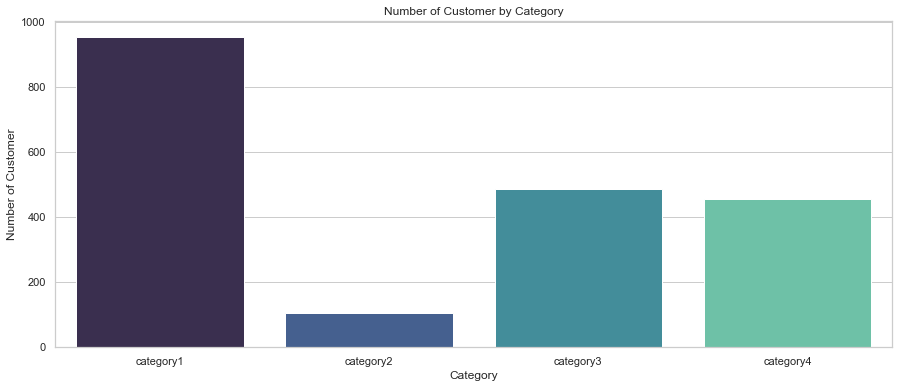

In [122]:
agex = ["category1" , "category2" , "category3" ,"category4"]
agey = [len(label[label==0]),len(label[label==1]),len(label[label==2]),len(label[label==3])]

plt.figure(figsize=(15,6))
sns.barplot(x=agex , y=agey , palette="mako")
plt.title("Number of Customer by Category")
plt.xlabel("Category")
plt.ylabel("Number of Customer")
plt.show()

In [128]:
df_segmentation2 = df_segmentation.copy()
df_segmentation2['Category'] = label.tolist()

In [184]:
print('                                        Information about every category                                               ')
for n in range(4):
    print('~~~~~~~~~~~~~ Category{0:} ~~~~~~~~~~~~~~~'.format(n+1))

    N=len(label[label==n])
    print('Number of Customer   :',N)

    moyenne = df_segmentation2['Income'][df_segmentation2['Category'] == n].mean()
    print('The averge of Income : {0:.2f}$'.format(moyenne))

    level = int(df_segmentation2[df_segmentation2['Category'] == n].Education.mode())
    education = {0:'other / unknown' , 1:'high school' , 2:'university',3:'graduate school'}
    print('Education            : '+education[level])

    male  = (int(df_segmentation2[(df_segmentation2['Category'] == n )& (df_segmentation2['Sex'] == 0)].Sex.count())/N)*100
    fmale = (int(df_segmentation2[(df_segmentation2['Category'] == n )& (df_segmentation2['Sex'] == 1)].Sex.count())/N)*100
    print('Male                 : {m:.2f}%          Female                 : {f:.2f}%'.format(m=male,f=fmale))

    single = (df_segmentation2[(df_segmentation2['Category'] == n )& (df_segmentation2['Marital status'] == 0)]['Marital status'].count()/N)*100
    non_single = (df_segmentation2[(df_segmentation2['Category'] == n )& (df_segmentation2['Marital status'] == 1)]['Marital status'].count()/N)*100
    print('single               : {m:.2f}%          non single             : {f:.2f}%'.format(m=single,f=non_single))

    Age = df_segmentation2['Age'][df_segmentation2['Category'] == n].mean()
    print('The averge of Age    : {0:.0f}'.format(Age))

    occup = int(df_segmentation2[df_segmentation2['Category'] == n].Occupation.mode())
    occupation = {0:'unemployed' , 1:'skilled employee' ,2:'highly qualified employee',}
    print('occupation           : '+occupation[occup])

    sett = int(df_segmentation2[df_segmentation2['Category'] == n]['Settlement size'].mode())
    Settlement_size = {0:'small city' ,1:'mid-sized city' ,2:'big city'}
    print('Settlement size      : '+Settlement_size[sett])

                                        Information about every category                                               
~~~~~~~~~~~~~ Category1 ~~~~~~~~~~~~~~~
Number of Customer   : 954
The averge of Income : 114888.38$
Education            : high school
Male                 : 49.48%          Female                 : 50.52%
single               : 47.27%          non single             : 52.73%
The averge of Age    : 34
occupation           : skilled employee
Settlement size      : small city
~~~~~~~~~~~~~ Category2 ~~~~~~~~~~~~~~~
Number of Customer   : 105
The averge of Income : 225124.87$
Education            : university
Male                 : 71.43%          Female                 : 28.57%
single               : 60.00%          non single             : 40.00%
The averge of Age    : 45
occupation           : highly qualified employee
Settlement size      : big city
~~~~~~~~~~~~~ Category3 ~~~~~~~~~~~~~~~
Number of Customer   : 486
The averge of Income : 79196.03$
Education         